In [2]:
from sklearn.metrics import roc_auc_score

In [3]:
colors = sns.color_palette("colorblind", 8)

In [73]:
def myROC(result_df, target, color,label=None,asc=False,alpha=1,size=2):
    condition_positive = result_df.iT.sum()
    condition_negative = (~result_df.iT.astype(bool)).astype(int).sum()

    doof = result_df.sort_values(by = [target], ascending=asc ).copy()
    doof['TPr'] = doof.iT.cumsum() / condition_positive
    doof['FPr'] = (~doof.iT.astype(bool)).astype(int).cumsum() / condition_negative
    roc_fool = doof[['iT',target]].dropna()
    rocscore = roc_auc_score(y_true = roc_fool.iT.values , 
                                y_score = roc_fool[target].values)
        
    if not label:
        label=target+" {}".format(rocscore)
    else:
        print(label, rocscore)
    
    x = doof.FPr.values
    y = doof.TPr.values
    ax.plot(x,y, color=color, label=label, 
            linewidth=size, alpha=alpha)

# The test datasets

In [4]:
test_hg = pd.read_csv("/home/ska/panos/myphdthesis/data/nimrod_datasets/M1957_hgstages.tsv.gz",sep='\t')
test_hg = test_hg[test_hg.set=='test']
test_hg = test_hg[test_hg.start >=300]

test_mm = pd.read_csv("/home/ska/panos/myphdthesis/data/nimrod_datasets/M1957_mm10stages.tsv.gz",sep='\t')
test_mm = test_mm[test_mm.set=='test']
test_mm = test_mm[test_mm.start >=300]

In [5]:
test_hg.shape,test_mm.shape

((16523, 8), (89212, 8))

# Nimrod

In [6]:
def load_nimrod_results(fp):
    n = pd.read_csv(fp,sep='\t')
    n['iT'] = np.argmax(n[['labels_0','labels_1']].values, axis=1)
    n['nimrod'] = n['logits_1'] - n['logits_0']
    return n

In [7]:

nimrod_hg_self = load_nimrod_results("/home/ska/panos/PubNimrod/results2019/tests/p63/test_M2321_keratino_dexe10_bsm8_self_auc94/test_results/test_after_TEST_batches.csv")
nimrod_hg_cross = load_nimrod_results("/home/ska/panos/PubNimrod/results2019/tests/p63/test_M2321_keratino_dexe10_bsm8_onZebra/test_results/test_after_TEST_batches.csv")

nimrod_dr_self = load_nimrod_results("/home/ska/panos/PubNimrod/results2019/tests/p63/test_M2321_zebra_dexe50_bsm7_selftest/test_results/test_after_TEST_batches.csv")
nimrod_dr_cross = load_nimrod_results("/home/ska/panos/PubNimrod/results2019/tests/p63/test_M2321_zebra_dexe50_bsm7_onKeratino/test_results/test_after_TEST_batches.csv")

In [8]:
[roc_auc_score(y_true=nimrod_hg_self.iT, y_score=nimrod_hg_self.nimrod),
 roc_auc_score(y_true=nimrod_hg_cross.iT, y_score=nimrod_hg_cross.nimrod),
 roc_auc_score(y_true=nimrod_dr_self.iT, y_score=nimrod_dr_self.nimrod),
 roc_auc_score(y_true=nimrod_dr_cross.iT, y_score=nimrod_dr_cross.nimrod)]

[0.93706525939688157,
 0.81350805763366119,
 0.9334960120801149,
 0.84316175873502253]

# PIQ

In [9]:
piqdf_dr = pd.read_csv("/home/ska/panos/PubNimrod/Others/results/M2321_zebra_test_PIQ.tsv",sep='\t')
piqdf_hg = pd.read_csv("/home/ska/panos/PubNimrod/Others/results/M2321_keratino_test_PIQ.tsv",sep='\t')

In [10]:
piqdf_dr.head()

index chrom    start      end stage     score  iT strand   set  \
0     32  chr1    92610    92630   24h  8.984323   0      +  test   
1    224  chr1   767183   767203   24h  9.892027   1      +  test   
2    225  chr1   767221   767241   24h  9.708056   1      +  test   
3    256  chr1   854641   854661   24h  9.217193   1      +  test   
4    308  chr1  1020501  1020521   24h  9.386005   0      +  test   

   piqPWMscore  piq_shape  piq_score  piq_purity  
0     5.854186  -0.352365   5.060383    0.531274  
1     5.956350   1.338913   8.972634    0.573626  
2     6.544697   0.254866   7.118855    0.542094  
3     6.985955   1.060289   9.374560    0.581308  
4     8.343043  -0.938171   6.229545    0.525108

In [11]:
roc_auc_score(y_true=piqdf_dr.iT, y_score=piqdf_dr.piq_score)

0.67455547837454977

In [12]:
roc_auc_score(y_true=piqdf_hg.iT, y_score=piqdf_hg.piq_score)

0.6369670669880807

# TFimp

In [13]:
def load_tfimp_results(fp):
    df = pd.read_csv(fp,sep='\t',header=None)
    df.columns = ['iT','tfimp']
    return df

In [14]:
tfimp_hg_self = load_tfimp_results("/home/ska/panos/PubNimrod/Others/tfimp/results/p63/p63_M2321_keratino_model0_selftest")
tfimp_hg_cross = load_tfimp_results("/home/ska/panos/PubNimrod/Others/tfimp/results/p63/p63_M2321_keratino_model0_zebratest")
tfimp_dr_self = load_tfimp_results("/home/ska/panos/PubNimrod/Others/tfimp/results/p63/p63_M2321_zebra_model0_selftest")
tfimp_dr_cross = load_tfimp_results("/home/ska/panos/PubNimrod/Others/tfimp/results/p63/p63_M2321_zebra_model0_keratinotest")

In [15]:
[roc_auc_score(y_true=tfimp_hg_self.iT, y_score=tfimp_hg_self.tfimp),
 roc_auc_score(y_true=tfimp_hg_cross.iT, y_score=tfimp_hg_cross.tfimp),
 roc_auc_score(y_true=tfimp_dr_self.iT, y_score=tfimp_dr_self.tfimp),
 roc_auc_score(y_true=tfimp_dr_cross.iT, y_score=tfimp_dr_cross.tfimp)]

[0.83311827073311284,
 0.7642253683553708,
 0.84936619445790518,
 0.83589988856505237]

# Wellington

In [16]:
test_hg_w = pd.read_csv("/home/ska/panos/PubNimrod/Others/results/M1957_hgstages_test_wellington.tsv",sep='\t',index_col=0)
test_mm_w = pd.read_csv("/home/ska/panos/PubNimrod/Others/results/M1957_mm10stages_test_wellington.tsv",sep='\t',index_col=0)

In [17]:
test_hg = test_hg.join(test_hg_w[['wellington']],how='left' )
test_mm = test_mm.join(test_mm_w[['wellington']],how='left' )

In [18]:
roc_auc_score(y_true=test_hg.iT, y_score=test_hg.wellington),roc_auc_score(y_true=test_mm.iT, y_score=test_mm.wellington)

(0.65243061173182104, 0.64335730365204857)

In [19]:
test_mm.head()

chrom    start      end        stage      score  iT strand   set  \
6   chr1  3210529  3210548  forebrain_0   9.049392   0      +  test   
12  chr1  3671573  3671592  forebrain_0   8.905954   0      +  test   
14  chr1  3671679  3671698  forebrain_0   9.522248   0      +  test   
15  chr1  3671764  3671783  forebrain_0   9.702581   0      +  test   
19  chr1  3672320  3672339  forebrain_0  10.089840   0      +  test   

    wellington  
6     1.551207  
12   10.118752  
14   14.370880  
15   14.218467  
19    5.494007

In [19]:
test_mm.to_csv("/home/ska/panos/myphdthesis/data/nimrod_mm_M1957_results.tsv",
              sep='\t', index=False)

In [20]:
test_hg.head()

chrom    start      end    stage      score  iT strand   set  wellington
2   chr10   180860   180879  gm12878   8.960501   0      +  test    4.875588
8   chr10   182235   182254  gm12878   8.979525   0      +  test    3.143332
15  chr10   557124   557143  gm12878  11.519602   1      +  test   18.746719
25  chr10  1034334  1034353  gm12878   8.911995   1      -  test   10.499191
35  chr10  1102754  1102773  gm12878   9.298795   0      -  test   11.022459

In [21]:
test_hg.to_csv("/home/ska/panos/myphdthesis/data/nimrod_hg_M1957_results.tsv",
              sep='\t', index=False)

In [72]:
# def myROC(result_df, target, color,label=None,asc=False,alpha=1,size=0.1):
#     condition_positive = result_df.iT.sum()
#     condition_negative = (~result_df.iT.astype(bool)).astype(int).sum()

#     doof = result_df.sort_values(by = [target], ascending=asc ).copy()
#     doof['TPr'] = doof.iT.cumsum() / condition_positive
#     doof['FPr'] = (~doof.iT.astype(bool)).astype(int).cumsum() / condition_negative
#     roc_fool = doof[['iT',target]].dropna()
#     rocscore = roc_auc_score(y_true = roc_fool.iT.values , 
#                                 y_score = roc_fool[target].values)
        
#     if not label:
#         label=target+" {}".format(rocscore)
#     else:
#         print(label, rocscore)
#     ax.scatter(x = doof.FPr.values, 
#                 y = doof.TPr.values, 
#                 s=size, 
#                 label=label,
#                c=color,alpha=alpha
#               )

In [23]:
# plt.rc('font', family='sans')
# plt.rc('pdf', fonttype=42)
# plt.rc('text', usetex=False)
# plt.rc('xtick', labelsize=12)
# plt.rc('ytick', labelsize=12)
# plt.rc('axes', labelsize=14)
# plt.rc('savefig',dpi=500)
# plt.rc('figure',dpi=100)
# plt.rc('legend', fontsize=14)

In [24]:
nimrod_hg_self
nimrod_hg_cross
nimrod_dr_self
nimrod_dr_cross

peak_ui   logits_0   logits_1  labels_0  labels_1  iT     nimrod
0            0  12.109560 -11.254073         1         0   0 -23.363633
1            1   0.940936   0.204836         0         1   1  -0.736099
2            2   5.771100  -4.005475         1         0   0  -9.776575
3            3   7.547826  -6.234551         0         1   1 -13.782377
4            4   3.236468  -2.097415         1         0   0  -5.333882
5            5   7.013356  -6.401468         1         0   0 -13.414824
6            6   7.779585  -6.616830         1         0   0 -14.396415
7            7   9.578980  -8.274291         1         0   0 -17.853271
8            8  -1.036021   1.811011         0         1   1   2.847031
9            9  -4.708814   5.567904         0         1   1  10.276717
10          10  -1.546071   3.017548         0         1   1   4.563619
11          11  -1.948418   3.616193         0         1   1   5.564611
12          12   5.606539  -3.829206         1         0   0  -9.435745
13          13   0.659997   1.284947         0         1   1   0.624950
14          14   8.265105  -6.664360         1         0   0 -14.929465
15          15   4.471296  -3.142477         0         1   1  -7.613773
16          16   3.568763  -2.174187         1         0   0  -5.742950
17          17   3.730944  -2.702714         1         0   0  -6.433658
18          18  -0.974474   1.579676         1         0   0   2.554150
19          19  -1.020879   1.341255         1         0   0   2.362134
20          20   5.173406  -3.435150         1         0   0  -8.608555
21          21   1.402281   0.239006         0         1   1  -1.163275
22          22   9.280443  -8.857664         1         0   0 -18.138107
23          23   1.561167  -0.990445         0         1   1  -2.551613
24          24   4.652871  -2.903988         1         0   0  -7.556859
25          25   6.660911  -5.565732         1         0   0 -12.226643
26          26   4.088496  -3.346370         1         0   0  -7.434866
27          27   2.437345  -1.323110         0         1   1  -3.760455
28          28   7.627562  -6.737835         1         0   0 -14.365398
29          29   1.228001   0.463643         1         0   0  -0.764358
...        ...        ...        ...       ...       ...  ..        ...
15135    15135   3.752324  -3.336516         1         0   0  -7.088840
15136    15136  -3.195040   3.631187         0         1   1   6.826228
15137    15137   4.522365  -4.040079         1         0   0  -8.562444
15138    15138   5.182827  -4.061445         1         0   0  -9.244271
15139    15139   6.237899  -4.928276         1         0   0 -11.166175
15140    15140   3.297624  -1.448824         0         1   1  -4.746448
15141    15141   1.482666  -0.598922         1         0   0  -2.081588
15142    15142   2.830931  -1.332033         1         0   0  -4.162964
15143    15143   0.195121   1.247305         1         0   0   1.052184
15144    15144  10.770376  -9.701130         1         0   0 -20.471506
15145    15145   5.371736  -3.971742         1         0   0  -9.343478
15146    15146   3.799630  -2.680655         0         1   1  -6.480286
15147    15147   6.675052  -5.274343         1         0   0 -11.949395
15148    15148   5.510119  -3.679461         1         0   0  -9.189580
15149    15149  10.154133  -9.115301         1         0   0 -19.269434
15150    15150   1.599015  -0.122913         1         0   0  -1.721928
15151    15151   1.664603  -1.033007         1         0   0  -2.697610
15152    15152   2.583515  -2.276255         0         1   1  -4.859770
15153    15153   4.303724  -3.682697         0         1   1  -7.986421
15154    15154   0.008928   1.724099         1         0   0   1.715171
15155    15155   1.287597  -0.871971         0         1   1  -2.159568
15156    15156   4.152563  -3.529856         1         0   0  -7.682418
15157    15157   6.291580  -5.282646         1         0   0 -11.574226
15158    15158   2.560193  -0.983646         1 

In [76]:
outname='tfigure_rocP63_keratino'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

# ax.set_title('ATACseq peak numbers overview')


ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')


myROC(nimrod_hg_self ,'nimrod',color = colors[1])
# myROC(nimrod_dr_self, 'nimrod',color = colors[1])

myROC(tfimp_hg_self, 'tfimp',color = colors[0])
# myROC(tfimp_dr_self, 'tfimp',color = colors[0])
myROC(piqdf_hg, 'piq_score',color = colors[2])

plt.title('P63 human(keratinocytes)')

lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
# lgnd.legendHandles[3]._sizes = [45]
# lgnd.legendHandles[4]._sizes = [45]
# # replace labels
new_labels = ['Nimrod 0.94',
              'Tfimp 0.83',
              'PIQ 0.63'              
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
    
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')


# plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

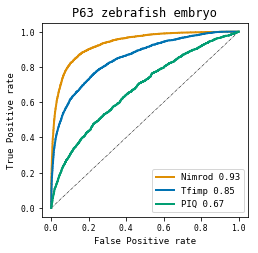

In [77]:
outname='tfigure_rocP63_zebra'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

# ax.set_title('ATACseq peak numbers overview')


ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')


myROC(nimrod_dr_self ,'nimrod',color = colors[1])
# myROC(nimrod_dr_self, 'nimrod',color = colors[1])

myROC(tfimp_dr_self, 'tfimp',color = colors[0])
# myROC(tfimp_dr_self, 'tfimp',color = colors[0])
myROC(piqdf_dr, 'piq_score',color = colors[2])

plt.title('P63 zebrafish embryo')

lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
# lgnd.legendHandles[3]._sizes = [45]
# lgnd.legendHandles[4]._sizes = [45]
# # replace labels
new_labels = ['Nimrod 0.93',
              'Tfimp 0.85',
              'PIQ 0.67'              
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
    
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')


# plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

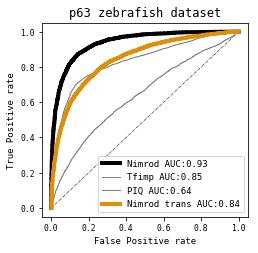

In [79]:
outname='tfigure_NEWct_P63_dre'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

# ax.set_title('ATACseq peak numbers overview')

ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')

myROC(nimrod_hg_self ,'nimrod',color = 'black',size=4)
myROC(tfimp_hg_self, 'tfimp',color = 'grey',size=1)
myROC(piqdf_hg, 'piq_score',color = 'grey',size=1)


# myROC(nimrod_hg_cross,'nimrod',color = colors[5])
myROC(nimrod_dr_cross, 'nimrod',color = colors[1], size=4)
# myROC(tfimp_hg_cross, 'tfimp',color = colors[0])
# myROC(tfimp_dr_cross, 'tfimp',color = colors[0])



plt.title('p63 zebrafish dataset')

lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
# lgnd.legendHandles[4]._sizes = [45]

new_labels = ['Nimrod AUC:0.93',
              'Tfimp AUC:0.85',
              'PIQ AUC:0.64',
              'Nimrod trans AUC:0.84',
              
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
    
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')


# plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

In [83]:
outname='tfigure_NEWct_P63_hg'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

# ax.set_title('ATACseq peak numbers overview')


ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')

myROC(nimrod_dr_self ,'nimrod',color = 'black',size=4)
myROC(tfimp_dr_self, 'tfimp',color = 'grey',size=1)
myROC(piqdf_dr, 'piq_score',color = 'grey',size=1)



# myROC(nimrod_hg_cross,'nimrod',color = colors[5])
myROC(nimrod_hg_cross, 'nimrod',color = colors[1],size=4)
# myROC(tfimp_hg_cross, 'tfimp',color = colors[0])
# myROC(tfimp_dr_cross, 'tfimp',color = colors[0])



plt.title('p63 human dataset')

lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
# lgnd.legendHandles[4]._sizes = [45]

new_labels = ['Nimrod AUC:0.93',
              'Tfimp AUC:0.85',
              'PIQ AUC:0.67',
              'Nimrod trans AUC:0.81',
              
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
    
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')


# plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

In [81]:
outname='tfigure_rocP63_nu_trans_hg'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

# ax.set_title('ATACseq peak numbers overview')


ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')


myROC(nimrod_hg_cross,'nimrod',color = colors[1])
# myROC(nimrod_dr_cross, 'nimrod',color = colors[1])

myROC(tfimp_hg_cross, 'tfimp',color = colors[0])
# myROC(tfimp_dr_cross, 'tfimp',color = colors[0])


plt.title('p63 human-train zebra-test')

lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
# lgnd.legendHandles[2]._sizes = [45]
# lgnd.legendHandles[3]._sizes = [45]
# lgnd.legendHandles[4]._sizes = [45]
# # replace labels
new_labels = ['Nimrod AUC:0.81',
#               'Nimrod zebra 0.84',
              'tfimp AUC:0.76',
#               'tfimp zebra 0.83'
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
    
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')


# plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

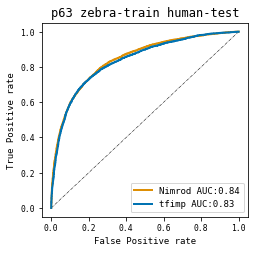

In [82]:
outname='tfigure_rocP63_nu_trans_dre'

Fwidth = THESIS_PAGEWIDTH*0.666
Fheight = Fwidth

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

# ax.set_title('ATACseq peak numbers overview')


ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')


# myROC(nimrod_hg_cross,'nimrod',color = colors[1])
myROC(nimrod_dr_cross, 'nimrod',color = colors[1])

# myROC(tfimp_hg_cross, 'tfimp',color = colors[0])
myROC(tfimp_dr_cross, 'tfimp',color = colors[0])


plt.title('p63 zebra-train human-test')


lgnd = plt.legend(loc='lower right')
# #change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
# lgnd.legendHandles[2]._sizes = [45]
# lgnd.legendHandles[3]._sizes = [45]
# lgnd.legendHandles[4]._sizes = [45]
# # replace labels
new_labels = [
#     'Nimrod hg 0.81',
              'Nimrod AUC:0.84',
#               'tfimp hg 0.76',
              'tfimp AUC:0.83'
]
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
    
    
    
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')


# plt.legend(loc='upper left')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.pdf'.format(outname))

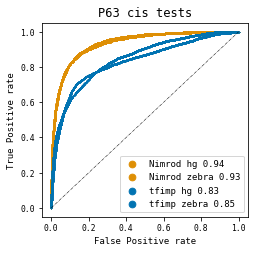

In [27]:
# outname='tfigure_rocP63_cis'

# Fwidth = THESIS_PAGEWIDTH*0.666
# Fheight = Fwidth

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

# # ax.set_title('ATACseq peak numbers overview')


# ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')


# myROC(nimrod_hg_self ,'nimrod',color = colors[1])
# myROC(nimrod_dr_self, 'nimrod',color = colors[1])

# myROC(tfimp_hg_self, 'tfimp',color = colors[0])
# myROC(tfimp_dr_self, 'tfimp',color = colors[0])


# plt.title('P63 cis tests')


# lgnd = plt.legend(loc='lower right')
# # #change the marker size manually for both lines
# lgnd.legendHandles[0]._sizes = [45]
# lgnd.legendHandles[1]._sizes = [45]
# lgnd.legendHandles[2]._sizes = [45]
# lgnd.legendHandles[3]._sizes = [45]
# # lgnd.legendHandles[4]._sizes = [45]
# # # replace labels
# new_labels = ['Nimrod hg 0.94',
#               'Nimrod zebra 0.93',
#               'tfimp hg 0.83',
#               'tfimp zebra 0.85'
# ]
# for t, l in zip(lgnd.texts, new_labels): 
#     t.set_text(l)
    
    
    
# ax.set_xlabel('False Positive rate')
# ax.set_ylabel('True Positive rate')


# # plt.legend(loc='upper left')
# fig.set_size_inches (Fwidth, Fheight)
# fig.savefig('../Figures/from_notebooks/rocfigures/{}.png'.format(outname))

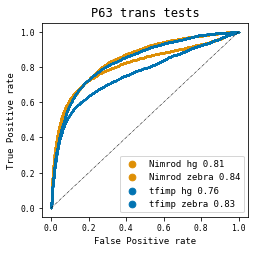

In [28]:
# outname='tfigure_rocP63_trans'

# Fwidth = THESIS_PAGEWIDTH*0.666
# Fheight = Fwidth

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.13, right=.99, top=.92)

# # ax.set_title('ATACseq peak numbers overview')


# ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')


# myROC(nimrod_hg_cross,'nimrod',color = colors[1])
# myROC(nimrod_dr_cross, 'nimrod',color = colors[1])

# myROC(tfimp_hg_cross, 'tfimp',color = colors[0])
# myROC(tfimp_dr_cross, 'tfimp',color = colors[0])


# plt.title('P63 trans tests')


# lgnd = plt.legend(loc='lower right')
# # #change the marker size manually for both lines
# lgnd.legendHandles[0]._sizes = [45]
# lgnd.legendHandles[1]._sizes = [45]
# lgnd.legendHandles[2]._sizes = [45]
# lgnd.legendHandles[3]._sizes = [45]
# # lgnd.legendHandles[4]._sizes = [45]
# # # replace labels
# new_labels = ['Nimrod hg 0.81',
#               'Nimrod zebra 0.84',
#               'tfimp hg 0.76',
#               'tfimp zebra 0.83'
# ]
# for t, l in zip(lgnd.texts, new_labels): 
#     t.set_text(l)
    
    
    
# ax.set_xlabel('False Positive rate')
# ax.set_ylabel('True Positive rate')


# # plt.legend(loc='upper left')
# fig.set_size_inches (Fwidth, Fheight)
# fig.savefig('../Figures/from_notebooks/rocfigures/{}.png'.format(outname))